In [ ]:
!pip install -U scikit-learn

In [38]:
import numpy as np
import pandas as pd
import os
import tarfile
import urllib
import matplotlib as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [5]:
dowload_root = r'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
local = r'datasets/housing'
url = dowload_root + r'datasets/housing/housing.tgz'

In [7]:
os.makedirs(local, exist_ok = True)
housing_data = local + r'housing.tgz'
urllib.request.urlretrieve(url, housing_data)
housing_tgz = tarfile.open(housing_data)
housing_tgz.extractall(path=local)
housing_tgz.close()

In [48]:
csv_path = os.path.join(local , r'housing.csv')
housing = pd.read_csv(csv_path)

In [49]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219B78C7BB0>,
      dtype=object)

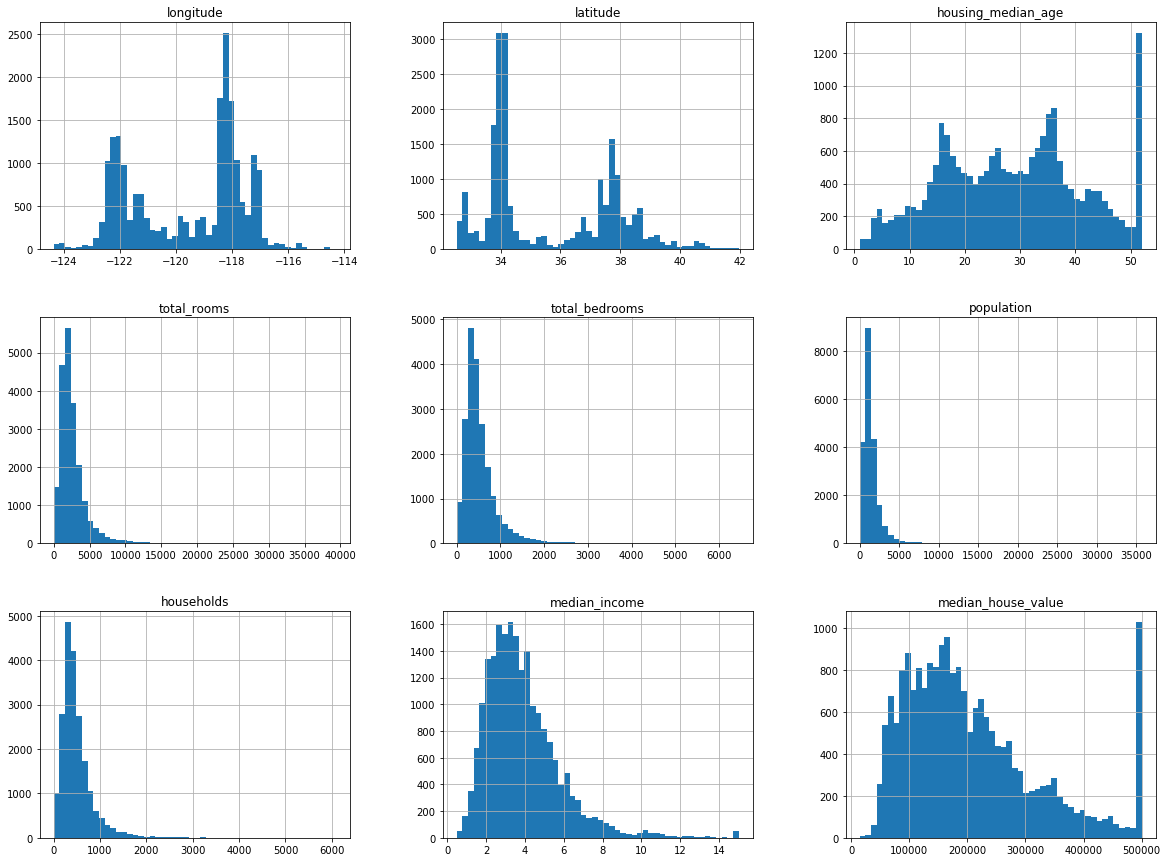

In [52]:
housing.hist(bins=50, figsize=(20,15))

In [53]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=33)

In [54]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3578,-118.53,34.24,24.0,2718.0,719.0,3018.0,644.0,2.9076,275300.0,<1H OCEAN
11132,-117.93,33.85,25.0,1026.0,288.0,1646.0,283.0,4.2019,163900.0,<1H OCEAN
14862,-117.09,32.65,25.0,3509.0,985.0,2359.0,899.0,2.6296,150000.0,NEAR OCEAN
4929,-118.24,33.99,41.0,1425.0,372.0,1803.0,353.0,1.6731,88200.0,<1H OCEAN
7805,-118.09,33.89,42.0,1150.0,215.0,708.0,204.0,3.6875,171500.0,<1H OCEAN


In [55]:
housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [56]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

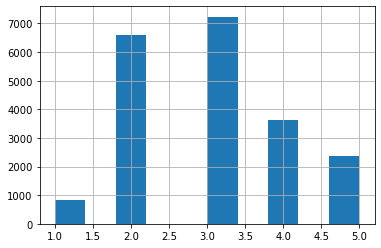

In [57]:
housing['income_cat'].hist()

In [58]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=33)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]    

In [60]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

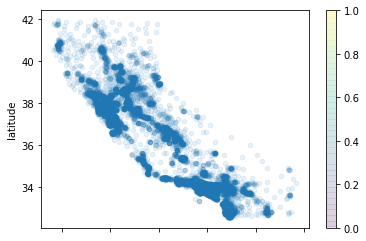

In [67]:
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.1, s = housing['population']/100, colorbar = True)

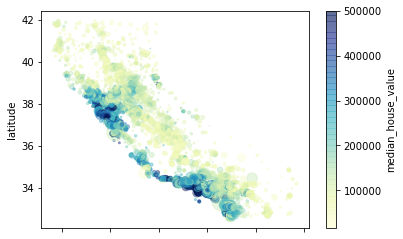

In [76]:
housing.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = housing['population']/100, c= 'median_house_value',colormap="YlGnBu",  colorbar = True)